In [1]:
import pandas as pd

# ID match
Viene de leer archivos "_alu" que asocian mrun con idalumno. Únicamente bases simce

In [2]:
data_tot_mrun = pd.read_csv('Datos\Intermedios\Agencia\20231017_idalumno_match_mrun_2002_2022.csv')

In [3]:
data_tot_mrun

,agno,curso,idalumno,mrun,rbd,is_duplicate,in_simce
0,2002,4b,100097,10830433.0,24898.0,False,1
1,2002,4b,154511,15854082.0,257.0,False,1
2,2002,4b,92062,15854120.0,10106.0,False,1
3,2002,4b,179790,15854121.0,1218.0,False,1
4,2002,4b,17375,15854222.0,22279.0,False,1
...,...,...,...,...,...,...,...
12012091,2007,8b,260259,2410680.0,11033.0,False,1
12012092,2014,2m,223671,16387974.0,26367.0,False,1
12012093,2011,8b,242325,10786905.0,10102.0,False,1
12012094,2006,2m,232363,17952154.0,17607.0,False,1


# Matrícula oficial 1° básico

In [4]:
MAT_1b_data_acum = pd.read_csv(r'Datos\Intermedios\DatosAbiertos\matricula_grade1_mrun_T1_T11_2002_2013.csv')

In [5]:
MAT_1b_data_acum.duplicated(['agno','mrun']).sum()

0

In [6]:
MAT_1b_data_acum = MAT_1b_data_acum.drop(columns = 'Unnamed: 0') # grade1_enrollment

In [7]:
MAT_1b_data_acum = MAT_1b_data_acum.rename(columns = {'agno': 'agno_grade1_enrolled'})

In [8]:
MAT_1b_data_acum

,agno_grade1_enrolled,mrun
0,2005,17.0
1,2005,18.0
2,2006,19.0
3,2006,20.0
4,2009,25.0
...,...,...
2881143,2013,25080510.0
2881144,2013,25080516.0
2881145,2013,25080521.0
2881146,2013,25080523.0


# Parents

In [9]:
panel_parents = pd.read_csv('Datos\Intermedios\Agencia\20231027_panel_cuestionario_padres.csv')

## Duplicados

In [10]:
# Duplicados en 2007 y 2017
panel_parents[panel_parents.duplicated(['agno','rbd','curso','idalumno'])].agno.value_counts()

agno
2017    101947
2007     37362
Name: count, dtype: int64

### 2017

In [11]:
data_2017 = panel_parents[panel_parents.agno == 2017]
# Todos en 4to básico
print(data_2017[data_2017.duplicated(['rbd','curso','idalumno'])].curso.value_counts())

curso
4b    101947
Name: count, dtype: int64


In [12]:
data_4b2017 = panel_parents[(panel_parents.agno == 2017) & (panel_parents.curso == '4b')]
data_4b2017 = data_4b2017.drop_duplicates(keep='first')
data_4b2017 = data_4b2017.drop_duplicates(subset = ['rbd','curso','idalumno'], keep='first')

In [13]:
panel_parents.loc[:, '4b2017'] = ((panel_parents.agno == 2017) & (panel_parents.curso == '4b') == 1)
panel_parents = panel_parents[panel_parents['4b2017'] == 0]
panel_parents = panel_parents.drop(columns=['4b2017'])
panel_parents = pd.concat([panel_parents, data_4b2017])

### 2007

In [14]:
panel_parents = panel_parents[~panel_parents.idalumno.isin([0,1,2,3])]

In [15]:
panel_parents = panel_parents[~panel_parents.duplicated(['agno','rbd','curso','idalumno'], keep = 'last')]

## mom dad ed a categorías

In [16]:
dict_educaction_level = {1: '1_Incomplete_elementary',
                         2: '1_Incomplete_elementary',
                         3: '1_Incomplete_elementary',
                         4: '1_Incomplete_elementary',
                         5: '1_Incomplete_elementary',
                         6: '1_Incomplete_elementary',
                         7: '1_Incomplete_elementary',
                         8: '1_Incomplete_elementary',
                         9:  '2_Complete_elementary',
                         10: '3_Incomplete_highschool',
                         11: '3_Incomplete_highschool',
                         12: '3_Incomplete_highschool',
                         13: '4_Complete_highschool',
                         14: '4_Complete_highschool',
                         15: '5_Some_higher_Ed_or_more',
                         16: '5_Some_higher_Ed_or_more' ,
                         17: '5_Some_higher_Ed_or_more',
                         18: '5_Some_higher_Ed_or_more',
                         19: '5_Some_higher_Ed_or_more',
                         20: '5_Some_higher_Ed_or_more',
                         21: np.nan,0: np.nan,99: np.nan}

In [17]:
# Mom
panel_parents['mom_ed_grouped'] = panel_parents.mom_ed
panel_parents.replace({"mom_ed_grouped": dict_educaction_level},inplace=True)
# Dad
panel_parents['dad_ed_grouped'] = panel_parents.dad_ed
panel_parents.replace({"dad_ed_grouped": dict_educaction_level},inplace=True)

In [18]:
pd.crosstab(panel_parents.mom_ed_grouped, panel_parents.dad_ed_grouped, normalize='all')

dad_ed_grouped,1_Incomplete_elementary,2_Complete_elementary,3_Incomplete_highschool,4_Complete_highschool,5_Some_higher_Ed_or_more
mom_ed_grouped,,,,,
1_Incomplete_elementary,0.053540,0.024328,0.018669,0.015726,0.002738
2_Complete_elementary,0.021577,0.037648,0.020709,0.024780,0.004405
3_Incomplete_highschool,0.016218,0.021498,0.042918,0.043851,0.011139
4_Complete_highschool,0.017639,0.030902,0.046672,0.188011,0.063367
5_Some_higher_Ed_or_more,0.003658,0.006324,0.013158,0.061968,0.208558


## Income CASEN

In [19]:
def match_income_decile_value(x):
    return df_income_values[df_income_values['range'].apply(lambda interval: x in interval)].index[0] + 1

In [20]:
unique_agno_income = panel_parents[['agno','income']].value_counts().index.tolist()
unique_agno_income = pd.DataFrame(unique_agno_income, columns = ['agno','income_value'])

In [21]:
CASEN_decil_income_hogar = pd.DataFrame([[1 ,    63552,    53219,     73332 ,  91659,   105179,  104839  ,    13564],
                                         [2 ,   154798,   172965,    199985,  237663,   281059,  302797  ,   197373],
                                         [3 ,   209511,   231663,    264708,  321407,   375933,  403555  ,   343462],
                                         [4 ,   260347,   302789,    335800,  390290,   456074,  491649  ,   436560],
                                         [5 ,   305858,   341338,    390624,  464460,   553829,  588583  ,   549849],
                                         [6 ,   366658,   417266,    452878,  573981,   652968,  736387  ,   702272],
                                         [7 ,   459053,   516790,    554409,  665211,   776195,  839392  ,   845255],
                                         [8 ,   565100,   633903,    690725,  820617,   970015, 1031655,   1081747],
                                         [9 ,   783795,   893636,    957229, 1175617, 1281418, 1423987, 1599886],
                                         [10, 1760392,   2077575,  2181145,  2600969, 2865760, 3225005, 3427933]])

CASEN_decil_income_hogar.columns = ['income_decil','2006', '2009', '2011','2013','2015','2017','2020']

In [22]:
df_income_values = pd.DataFrame([[1 ,  0       , 100000 ],
                                 [2 ,  100001  , 200000 ],
                                 [3 ,  200001  , 300000 ],
                                 [4 ,  300001  , 400000 ],
                                 [5 ,  400001  , 500000 ],
                                 [6 ,  500001  , 600000 ],
                                 [7 ,  600001  , 800000 ],
                                 [8 ,  800001  , 1000000],
                                 [9 ,  1000001 , 1200000],
                                 [10, 1200001 , 1400000 ],
                                 [11, 1400001 , 1600000 ],
                                 [12, 1600001 , 1800000 ],
                                 [13, 1800001 , 2000000 ],
                                 [14, 2000001 , 2200000 ],
                                 [15, 2200000 ,float('inf')]])

df_income_values.columns = ['income_value', 'range_min','range_max']

df_income_values['range'] = df_income_values.apply(lambda x: pd.Interval(left=x.range_min, right=x.range_max), axis= 1)

In [23]:
# Los datos que proporcionaste
data = {
    'income_decile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '2006': [63552, 154798, 209511, 260347, 305858, 366658, 459053, 565100, 783795, 1760392],
    '2009': [53219, 172965, 231663, 302789, 341338, 417266, 516790, 633903, 893636, 2077575],
    '2011': [73332, 199985, 264708, 335800, 390624, 452878, 554409, 690725, 957229, 2181145],
    '2013': [91659, 237663, 321407, 390290, 464460, 573981, 665211, 820617, 1175617, 2600969],
    '2015': [105179, 281059, 375933, 456074, 553829, 652968, 776195, 970015, 1281418, 2865760],
    '2017': [104839, 302797, 403555, 491649, 588583, 736387, 839392, 1031655, 1423987, 3225005],
    '2020': [13564, 197373, 343462, 436560, 549849, 702272, 845255, 1081747, 1599886, 3427933]
}

# Crear un DataFrame con los datos
df_deciles_casen = pd.DataFrame(data)
# 2020 too odd 
df_deciles_casen = df_deciles_casen.drop(columns = '2020')

In [24]:
df_deciles_casen

,income_decile,2006,2009,2011,2013,2015,2017
0,1,63552,53219,73332,91659,105179,104839
1,2,154798,172965,199985,237663,281059,302797
2,3,209511,231663,264708,321407,375933,403555
3,4,260347,302789,335800,390290,456074,491649
4,5,305858,341338,390624,464460,553829,588583
5,6,366658,417266,452878,573981,652968,736387
6,7,459053,516790,554409,665211,776195,839392
7,8,565100,633903,690725,820617,970015,1031655
8,9,783795,893636,957229,1175617,1281418,1423987
9,10,1760392,2077575,2181145,2600969,2865760,3225005


In [25]:
x = np.array([2006, 2009, 2011, 2013, 2015, 2017])
xnew = np.linspace(2002, 2022, num = 21)

deciles_casen_extrap = []
for d in range(10):
    print(d)
    y = df_deciles_casen.loc[d].values[1:]
    ynew = np.interp(xnew, x, y)
    deciles_casen_extrap +=[ynew]

0
1
2
3
4
5
6
7
8
9


In [26]:
df_deciles_casen = pd.DataFrame(deciles_casen_extrap)
df_deciles_casen.columns = range(2002,2023)
df_deciles_casen['income_decile'] = range(1,11)

In [27]:
# Convertir la tabla a un formato más largo (melt)
melted_df = pd.melt(df_deciles_casen, id_vars='income_decile', var_name='agno', value_name='Income')
melted_df['income_value'] = melted_df.Income.apply(match_income_decile_value)
melted_df['agno'] = pd.to_numeric(melted_df['agno'])

In [28]:
df_income_merged = pd.merge(melted_df, unique_agno_income, on = ['agno','income_value'], how = 'right')
df_income_merged = df_income_merged.sort_values(by = ['agno', 'income_value'], ascending=True)
df_income_merged = pd.merge(df_income_merged,df_income_values, on = 'income_value', how = 'left' )
df_income_merged['range_mean'] = df_income_merged[['range_min','range_max']].mean(axis = 1)

In [29]:
for ind, row in df_income_merged.iterrows():
    if str(row.income_decile) == 'nan':
        a = row.agno
        val = row.range_mean
        closest_index = (df_deciles_casen[a] - val).abs().idxmin()
        closest_value = df_deciles_casen[a][closest_index]
        decil = closest_index + 1
        print(row)
        df_income_merged.loc[ind, 'income_decile'] = decil
        
df_income_merged = df_income_merged.sort_values(by = ['agno','income_decile', 'income_value'], ascending =True)
df_income_merged = df_income_merged.drop_duplicates(subset = ['agno','income_value'], keep='last')

income_decile                      NaN
agno                              2002
Income                             NaN
income_value                       8.0
range_min                       800001
range_max                    1000000.0
range            (800001.0, 1000000.0]
range_mean                    900000.5
Name: 9, dtype: object
income_decile                       NaN
agno                               2002
Income                              NaN
income_value                        9.0
range_min                       1000001
range_max                     1200000.0
range            (1000001.0, 1200000.0]
range_mean                    1100000.5
Name: 10, dtype: object
income_decile                       NaN
agno                               2002
Income                              NaN
income_value                       10.0
range_min                       1200001
range_max                     1400000.0
range            (1200001.0, 1400000.0]
range_mean                    1300000.5
N

In [30]:
df_income_summary = df_income_merged[['agno','income_value', 'income_decile']].rename(columns = {'income_value':'income', 
                                                                                                 'income_decile':'income_decil_casen'})

In [31]:
df_income_summary

,agno,income,income_decil_casen
0,2002,1.0,1.0
1,2002,2.0,2.0
3,2002,3.0,4.0
5,2002,4.0,6.0
6,2002,5.0,7.0
...,...,...,...
296,2022,11.0,9.0
297,2022,12.0,9.0
298,2022,13.0,9.0
299,2022,14.0,9.0


In [32]:
panel_parents = pd.merge(panel_parents,df_income_summary, on = ['agno', 'income'], how = 'left', validate = 'many_to_one')

In [33]:
panel_parents['income_quintil_casen'] = panel_parents.income_decil_casen
panel_parents['income_quintil_casen'] = panel_parents.income_quintil_casen.replace({2:1,3:2,4:2,
                                                                                   5:3,6:3,7:4,
                                                                                    8:4, 9:5, 10:5})

In [34]:
for a in range(2002,2023):
    print(a)
    print(panel_parents[panel_parents.agno == a].income_quintil_casen.value_counts(dropna=False).sort_index())

2002
income_quintil_casen
1.0    162002
2.0     30739
3.0     14407
4.0     14148
5.0     23508
NaN      8819
Name: count, dtype: int64
2003
income_quintil_casen
1.0    132846
2.0     31891
3.0     16022
4.0     17483
5.0     20868
NaN      3837
Name: count, dtype: int64
2004
income_quintil_casen
1.0    150998
2.0     37952
3.0     19499
4.0     20726
5.0     25508
NaN      7846
Name: count, dtype: int64
2005
income_quintil_casen
1.0    137390
2.0     34248
3.0     17671
4.0     18896
5.0     26734
NaN      7146
Name: count, dtype: int64
2006
income_quintil_casen
1.0    219225
2.0     70616
3.0     37397
4.0     41314
5.0     60176
NaN     41851
Name: count, dtype: int64
2007
income_quintil_casen
1.0    191352
2.0     63966
3.0     34713
4.0     51465
5.0     32343
NaN      8525
Name: count, dtype: int64
2008
income_quintil_casen
1.0    186373
2.0     77832
3.0     42321
4.0     64905
5.0     50754
NaN      6857
Name: count, dtype: int64
2009
income_quintil_casen
1.0    186287
2.0     

In [35]:
pd.crosstab(panel_parents.income_decil_casen, panel_parents.income_quintil_casen)

income_quintil_casen,1.0,2.0,3.0,4.0,5.0
income_decil_casen,,,,,
1.0,1789889,0,0,0,0
2.0,2355368,0,0,0,0
3.0,0,718911,0,0,0
4.0,0,972955,0,0,0
5.0,0,0,613921,0,0
6.0,0,0,498977,0,0
7.0,0,0,0,506447,0
8.0,0,0,0,432782,0
9.0,0,0,0,0,609444


## Income UF

In [36]:
# categorical income to UF anual 
mean_income_category = [50000, 150000, 250000, 350000, 450000, 550000,700000,900000,1100000,1300000,1500000,1700000,1900000,2100000,2300000]
uf_agno = pd.read_excel(r'Datos\Apoyo\uf_anual_2000_2022.xls')

uf_pesos_dict = {}
for a in range(2002,2023):
    print(a)
    uf = uf_agno[uf_agno.agno == a].uf.values[0]
    list_year = []
    for cat in range(1,16):
        cat_uf = np.round(mean_income_category[cat-1]/uf,3)
        list_year = list_year  + [cat_uf]
    uf_pesos_dict[a] = list_year

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [37]:
panel_parents

,agno,idalumno,rbd,parental_exp,income,mom_ed,dad_ed,respondant,respondant_age,curso,mom_ed_grouped,dad_ed_grouped,income_decil_casen,income_quintil_casen
0,2005,255724,5.0,4.0,2.0,16.0,NaN,1.0,NaN,4b,5_Some_higher_Ed_or_more,NaN,2.0,1.0
1,2005,255725,5.0,5.0,2.0,14.0,13.0,1.0,NaN,4b,4_Complete_highschool,4_Complete_highschool,2.0,1.0
2,2005,255727,5.0,5.0,2.0,13.0,13.0,3.0,NaN,4b,4_Complete_highschool,4_Complete_highschool,2.0,1.0
3,2005,255728,5.0,2.0,2.0,8.0,13.0,1.0,NaN,4b,1_Incomplete_elementary,4_Complete_highschool,2.0,1.0
4,2005,255730,5.0,NaN,2.0,9.0,11.0,NaN,NaN,4b,2_Complete_elementary,3_Incomplete_highschool,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307528,2017,256273,10527.0,4.0,2.0,13.0,11.0,12.0,37.0,4b,4_Complete_highschool,3_Incomplete_highschool,1.0,1.0
9307529,2017,256275,10527.0,4.0,4.0,12.0,10.0,12.0,32.0,4b,3_Incomplete_highschool,3_Incomplete_highschool,2.0,1.0
9307530,2017,256276,10527.0,5.0,6.0,9.0,21.0,12.0,35.0,4b,2_Complete_elementary,NaN,5.0,3.0
9307531,2017,256277,10527.0,4.0,3.0,10.0,10.0,12.0,36.0,4b,3_Incomplete_highschool,3_Incomplete_highschool,2.0,1.0


In [38]:
def replace_uf(agno, income):
    if str(income) == 'nan':
        return np.nan
    else:
        return uf_pesos_dict[int(agno)][int(income)-1]

panel_parents['income_uf'] = panel_parents.income
panel_parents['income_uf'] = panel_parents.apply(lambda x: replace_uf(x.agno, x.income_uf), axis=1)

In [39]:
# Calculate quintiles based on 'agno' (year) for 'income_uf'
panel_parents['income_quintil_uf'] = panel_parents.groupby('agno')['income_uf'].transform(
    lambda x: pd.qcut(x, q=5, labels=False, duplicates='drop') + 1
)

In [40]:
panel_parents['income_p40_p80_uf'] = panel_parents.groupby('agno')['income_uf'].transform(lambda x: np.select(
    [
        x <= x.quantile(0.4),
        x.between(x.quantile(0.4), x.quantile(0.8)),
        x > x.quantile(0.8)
    ],
    [1, 2, 3]
))

panel_parents['income_p40_p80_uf'] = panel_parents.income_p40_p80_uf.replace(0,np.nan)

## Expectations a binaria

In [41]:
panel_parents['parental_exp_cc_or_more'] = panel_parents.parental_exp
panel_parents['parental_exp_cc_or_more'] = panel_parents.parental_exp_cc_or_more.replace({1:0 ,2:0, 3:0 ,4:1 ,5:1 ,6:1})

panel_parents['parental_exp_college_or_more'] = panel_parents.parental_exp
panel_parents['parental_exp_college_or_more'] = panel_parents.parental_exp_college_or_more.replace({1:0 ,2:0, 3:0 ,4:0 ,5:1 ,6:1})

# Scores

In [42]:
panel_alu = pd.read_csv('Datos\Intermedios\Agencia\20231027_panel_puntaje_estudiantes.csv', low_memory=False)

In [43]:
# Sacar ingles 
panel_alu.loc[(panel_alu.agno == 2012) & (panel_alu.curso == '3m'), 'simce_mat'] = np.nan
panel_alu.loc[(panel_alu.agno == 2012) & (panel_alu.curso == '3m'), 'simce_lect'] = np.nan

In [44]:
simce_mat_2002_mean = panel_alu[panel_alu.agno == 2002].simce_mat.mean()
simce_mat_2002_std = panel_alu[panel_alu.agno == 2002].simce_mat.std()
panel_alu['simce_mat_norm2002'] = (panel_alu.simce_mat - simce_mat_2002_mean) / simce_mat_2002_std

simce_lect_2002_mean = panel_alu[panel_alu.agno == 2002].simce_lect.mean()
simce_lect_2002_std = panel_alu[panel_alu.agno == 2002].simce_lect.std()
panel_alu['simce_lect_norm2002'] = (panel_alu.simce_lect - simce_lect_2002_mean) / simce_lect_2002_std

2002 -6.117084924230209e-16 0.9999999999999878


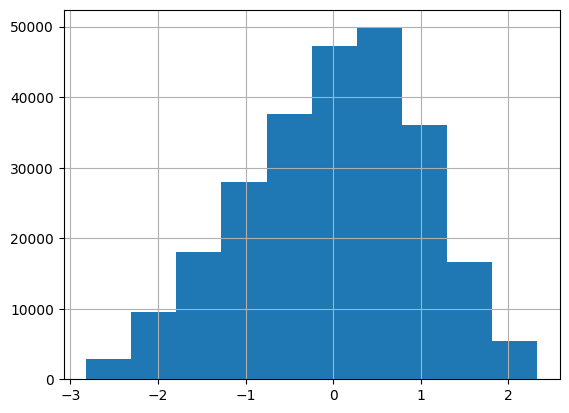

2003 0.02930646109463335 0.9318315997966244


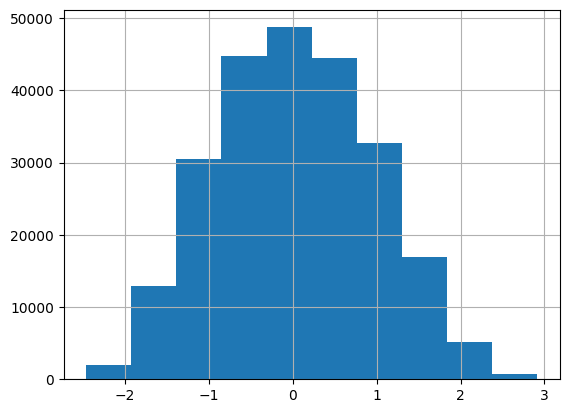

2004 -0.009712451371136018 0.9701369656431175


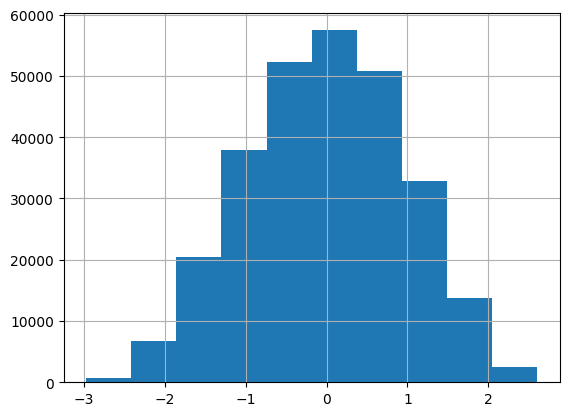

2005 0.07706390666443225 0.9927796685594337


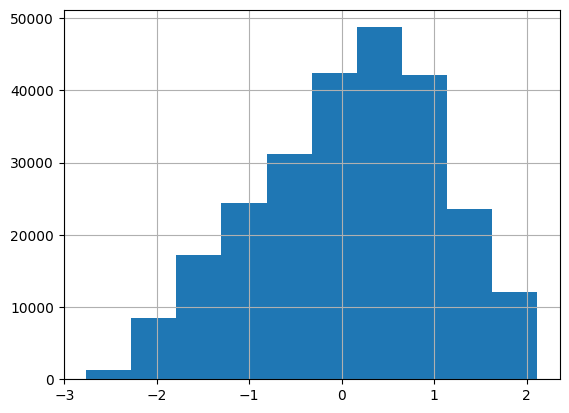

2006 0.04461678820492346 0.9857493227622066


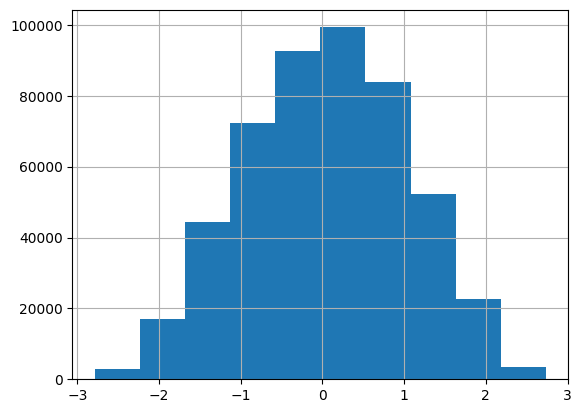

2007 0.042455857969238585 0.9748194905298454


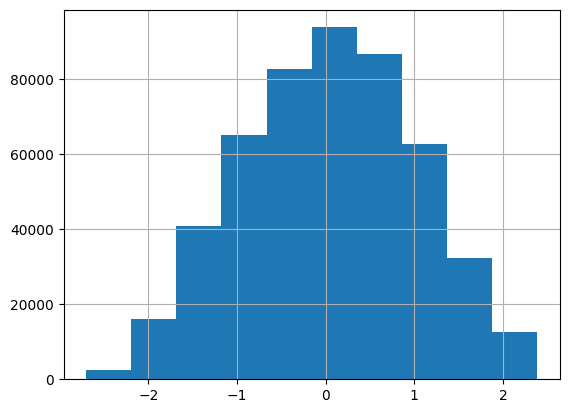

2008 0.11724948094323162 0.974017617698746


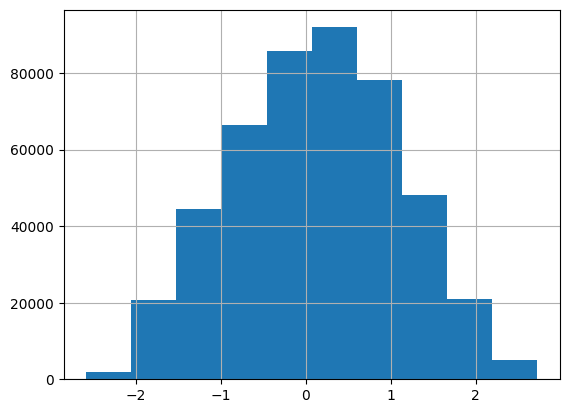

2009 0.10027991665771366 0.9785294977697621


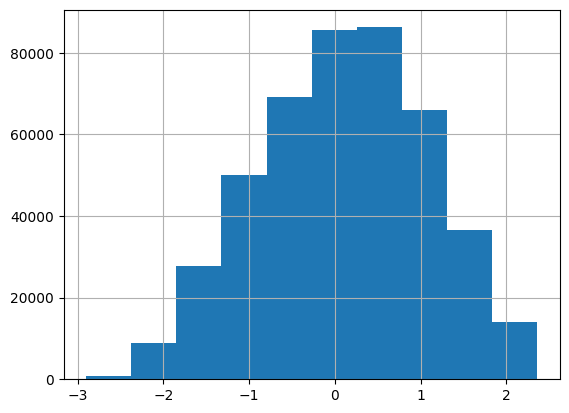

2010 0.2516498066386779 0.9512121234992327


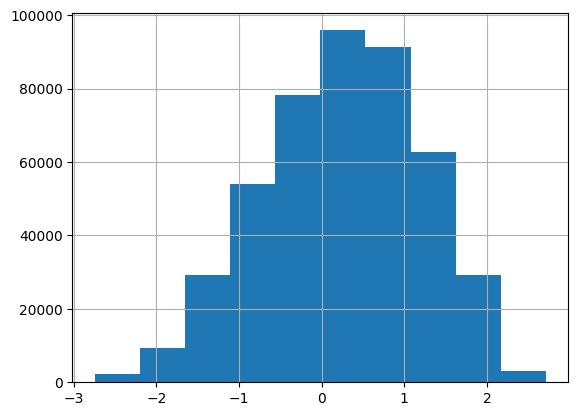

2011 0.16424721833978853 0.945546716757325


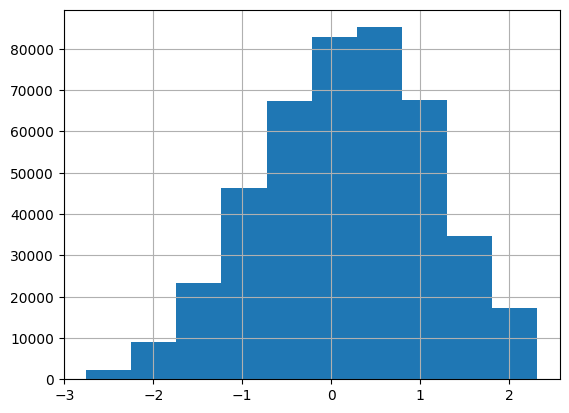

2012 0.14121205371867113 0.976583475664257


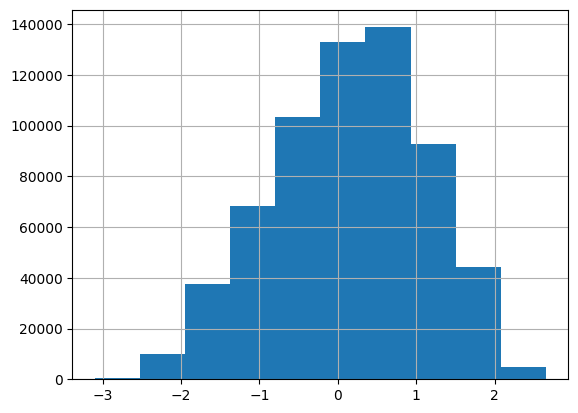

2013 0.07417877473841314 0.9600338409278337


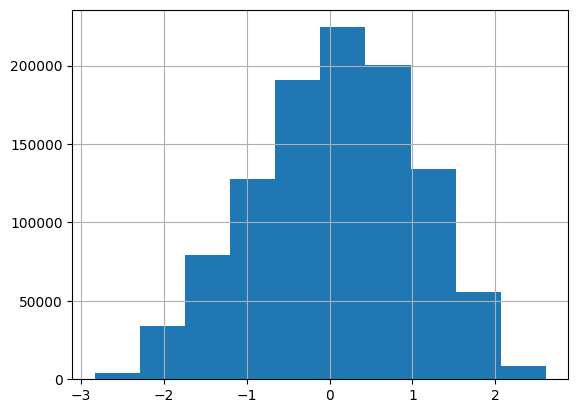

2014 -0.024978676935720763 0.968936444131858


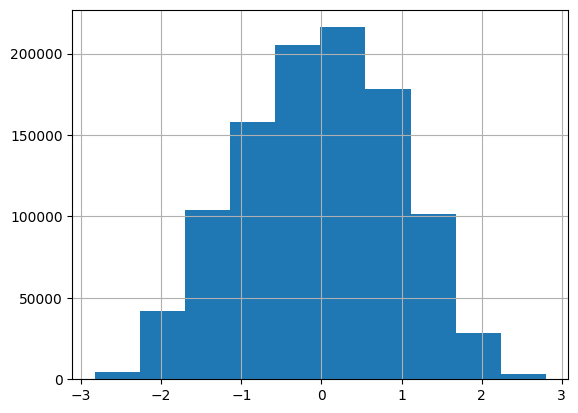

2015 -0.0034822038997271232 0.9603499896923563


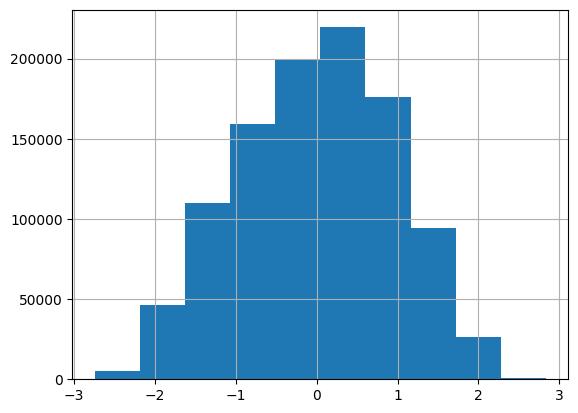

2016 0.058257797528117015 0.9811854699704102


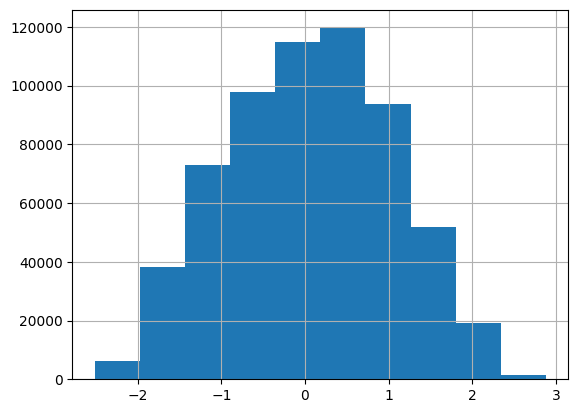

2017 0.06990544730478382 0.9830964429809786


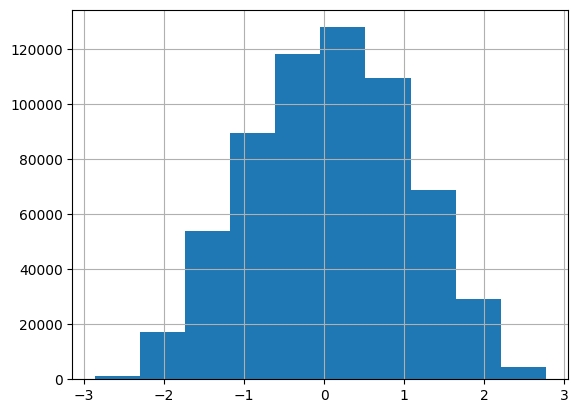

2018 0.10505622980571915 0.9841194459712522


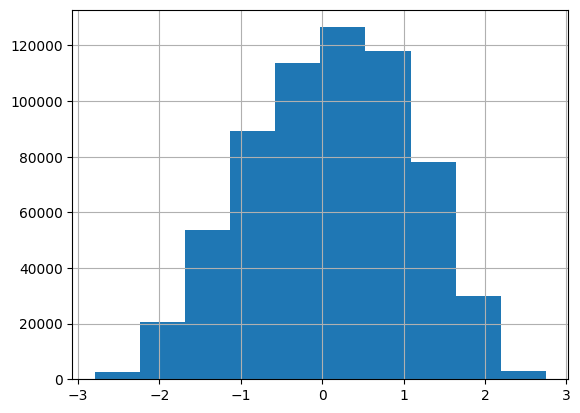

2019 -0.19079687186531208 0.9481305015838646


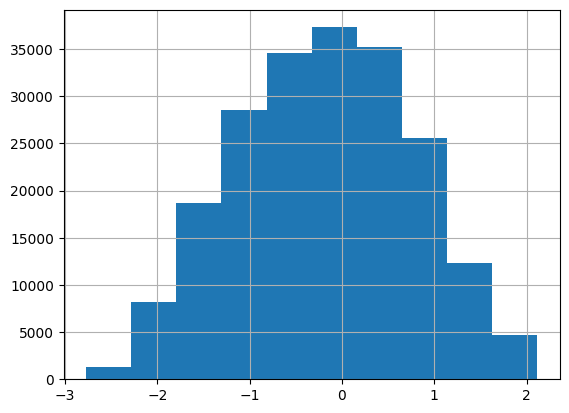

2020 nan nan


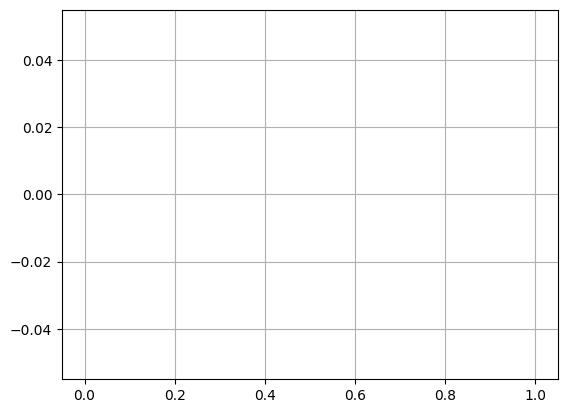

2021 nan nan


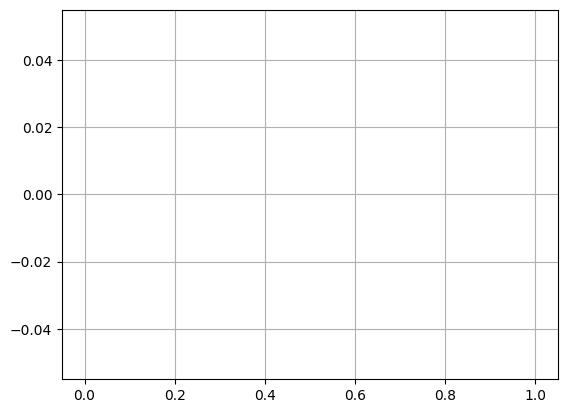

2022 0.0807259860892108 1.032993900497356


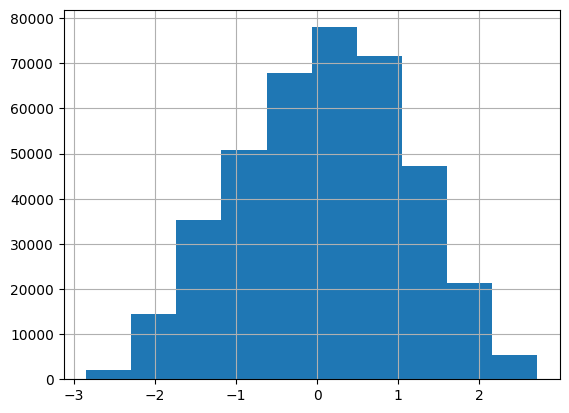

In [45]:
import matplotlib.pyplot as plt
for a in range(2002,2023):
    data = panel_alu[panel_alu.agno == a]
    print(a, data.simce_lect_norm2002.mean(), data.simce_lect_norm2002.std())
    data.simce_lect_norm2002.hist()
    plt.show()

# Students

In [46]:
panel_asp_alu = pd.read_csv('Datos\Intermedios\Agencia\20231027_panel_cuestionario_estudiantes.csv')

In [47]:
pd.crosstab(panel_asp_alu.agno, panel_asp_alu.curso)

curso,2m,8b
agno,,
2009,0,215611
2010,227628,0
2011,0,227038
2012,191502,0
2013,174824,216158
2014,178957,222512
2015,194341,214927
2016,199820,0
2017,200691,215201


# Merge

## Mrun-idalumno + matricula grade 1

In [48]:
df_merge1 = pd.merge(data_tot_mrun,MAT_1b_data_acum, on = ['mrun'], how = 'outer', validate = 'many_to_one', indicator =True )
df_merge1 = df_merge1.rename(columns = {'_merge':'merge1_data_tot_mrun_MAT_1b_data_acum'})

df_merge1.merge1_data_tot_mrun_MAT_1b_data_acum.value_counts()

merge1_data_tot_mrun_MAT_1b_data_acum
both          8560592
left_only     3451504
right_only      35953
Name: count, dtype: int64

In [49]:
# Mrun vs idalumno desde TODOS los simce + matricula 1° básico para 11 cohortes  
df_merge1

,agno,curso,idalumno,mrun,rbd,is_duplicate,in_simce,agno_grade1_enrolled,merge1_data_tot_mrun_MAT_1b_data_acum
0,2002.0,4b,100097.0,10830433.0,24898.0,False,1.0,NaN,left_only
1,2008.0,2m,43248.0,10830433.0,12033.0,False,1.0,NaN,left_only
2,2002.0,4b,154511.0,15854082.0,257.0,False,1.0,NaN,left_only
3,2005.0,4b,244091.0,15854082.0,7639.0,False,1.0,NaN,left_only
4,2009.0,8b,155807.0,15854082.0,7639.0,False,1.0,NaN,left_only
...,...,...,...,...,...,...,...,...,...
12048044,NaN,NaN,NaN,25080510.0,NaN,NaN,NaN,2013.0,right_only
12048045,NaN,NaN,NaN,25080516.0,NaN,NaN,NaN,2013.0,right_only
12048046,NaN,NaN,NaN,25080521.0,NaN,NaN,NaN,2013.0,right_only
12048047,NaN,NaN,NaN,25080523.0,NaN,NaN,NaN,2013.0,right_only


## Parents + scores

In [50]:
panel_parents.duplicated(['agno', 'idalumno','rbd', 'curso']).sum()

0

In [51]:
panel_alu.duplicated(['agno', 'idalumno','rbd', 'curso']).sum()

0

In [52]:
panel_parents_alu = pd.merge(panel_parents, panel_alu, on = ['agno', 'idalumno','rbd', 'curso'], 
                            how = 'outer', validate = 'one_to_one', indicator = True)

panel_parents_alu = panel_parents_alu.rename(columns = {'_merge':'merge2_panel_parents_panel_alu'})

In [53]:
panel_parents_alu

,agno,idalumno,rbd,parental_exp,income,mom_ed,dad_ed,respondant,respondant_age,curso,...,income_quintil_uf,income_p40_p80_uf,parental_exp_cc_or_more,parental_exp_college_or_more,cod_curso,simce_mat,simce_lect,simce_mat_norm2002,simce_lect_norm2002,merge2_panel_parents_panel_alu
0,2005,255724.0,5.0,4.0,2.0,16.0,NaN,1.0,NaN,4b,...,1.0,1.0,1.0,0.0,1899.0,178.59000,140.30000,-1.275738,-2.070125,both
1,2005,255725.0,5.0,5.0,2.0,14.0,13.0,1.0,NaN,4b,...,1.0,1.0,1.0,1.0,1899.0,341.63000,358.72000,1.744648,1.999407,both
2,2005,255727.0,5.0,5.0,2.0,13.0,13.0,3.0,NaN,4b,...,1.0,1.0,1.0,1.0,1899.0,231.89000,173.17000,-0.288333,-1.457702,both
3,2005,255728.0,5.0,2.0,2.0,8.0,13.0,1.0,NaN,4b,...,1.0,1.0,0.0,0.0,1899.0,141.42000,210.52000,-1.964328,-0.761808,both
4,2005,255730.0,5.0,NaN,2.0,9.0,11.0,NaN,NaN,4b,...,1.0,1.0,NaN,NaN,1899.0,236.85001,260.17999,-0.196446,0.163441,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060831,2022,235766.0,41814.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,NaN,NaN,NaN,9603,NaN,NaN,NaN,NaN,right_only
12060832,2022,175255.0,41845.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,NaN,NaN,NaN,7218,318.22000,355.00000,1.310968,1.930097,right_only
12060833,2022,175227.0,41845.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,NaN,NaN,NaN,7218,NaN,NaN,NaN,NaN,right_only
12060834,2022,143371.0,41899.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,NaN,NaN,NaN,5967,255.60000,NaN,0.150905,NaN,right_only


### + student expectations

In [54]:
panel_asp_alu = panel_asp_alu[~panel_asp_alu.idalumno.isna()]

In [55]:
panel_parents_alu = pd.merge(panel_parents_alu, panel_asp_alu, on = ['agno','curso', 'rbd', 'idalumno'], 
                            how = 'left' , validate = 'many_to_one', indicator=True)

In [56]:
panel_parents_alu = panel_parents_alu.rename(columns = {'_merge':'merge3_panel_parents_panel_alu_asp'})

In [57]:
panel_parents_alu.merge3_panel_parents_panel_alu_asp.value_counts()

merge3_panel_parents_panel_alu_asp
left_only     8965926
both          3094910
right_only          0
Name: count, dtype: int64

In [58]:
panel_parents_alu

,agno,idalumno,rbd,parental_exp,income,mom_ed,dad_ed,respondant,respondant_age,curso,...,parental_exp_college_or_more,cod_curso,simce_mat,simce_lect,simce_mat_norm2002,simce_lect_norm2002,merge2_panel_parents_panel_alu,student_expectations,student_exp_coordinada,merge3_panel_parents_panel_alu_asp
0,2005,255724.0,5.0,4.0,2.0,16.0,NaN,1.0,NaN,4b,...,0.0,1899.0,178.59000,140.30000,-1.275738,-2.070125,both,NaN,NaN,left_only
1,2005,255725.0,5.0,5.0,2.0,14.0,13.0,1.0,NaN,4b,...,1.0,1899.0,341.63000,358.72000,1.744648,1.999407,both,NaN,NaN,left_only
2,2005,255727.0,5.0,5.0,2.0,13.0,13.0,3.0,NaN,4b,...,1.0,1899.0,231.89000,173.17000,-0.288333,-1.457702,both,NaN,NaN,left_only
3,2005,255728.0,5.0,2.0,2.0,8.0,13.0,1.0,NaN,4b,...,0.0,1899.0,141.42000,210.52000,-1.964328,-0.761808,both,NaN,NaN,left_only
4,2005,255730.0,5.0,NaN,2.0,9.0,11.0,NaN,NaN,4b,...,NaN,1899.0,236.85001,260.17999,-0.196446,0.163441,both,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060831,2022,235766.0,41814.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,9603,NaN,NaN,NaN,NaN,right_only,NaN,NaN,left_only
12060832,2022,175255.0,41845.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,7218,318.22000,355.00000,1.310968,1.930097,right_only,NaN,NaN,left_only
12060833,2022,175227.0,41845.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,7218,NaN,NaN,NaN,NaN,right_only,NaN,NaN,left_only
12060834,2022,143371.0,41899.0,NaN,NaN,NaN,NaN,NaN,NaN,4b,...,NaN,5967,255.60000,NaN,0.150905,NaN,right_only,NaN,NaN,left_only


## + School data 

In [59]:
EE_data_acum = pd.read_csv('Datos\Intermedios\DatosAbiertos\20231117_schools_2002_2012.csv')

In [60]:
EE_data_acum.duplicated(['agno','rbd']).sum()

0

In [61]:
panel_parents_alu = pd.merge(panel_parents_alu, EE_data_acum, on = ['agno','rbd'], 
                            how = 'left' ,validate = 'many_to_one')

## IVE

In [62]:
IVE_EE_10_19 = pd.read_csv(r'Datos\Intermedios\DatosAbiertos\IVE_total_10_19.csv')

In [63]:
IVE_EE_10_19 = IVE_EE_10_19.drop(columns = ['ciclo']).groupby(['agno','rbd'], as_index=False).mean()

In [64]:
panel_parents_alu = pd.merge(panel_parents_alu, IVE_EE_10_19, on = ['agno','rbd'], 
                            how = 'left' ,validate = 'many_to_one')

## Rendimiento

### Todo con idalumno - mrun primero

In [85]:
panel_parents_alu_id = pd.merge(df_merge1, panel_parents_alu, on = ['agno','rbd', 'curso', 'idalumno'], 
                                how = 'left' ,validate = 'many_to_one')

### Final

In [101]:
REND_data_acum_pct = pd.read_csv(r'Datos\Intermedios\DatosAbiertos\20231127_rendimiento_asistencia_sit_fin_2002_2023.csv',
                                low_memory=False)

In [103]:
REND_data_acum_pct['gen_alu'] = REND_data_acum_pct.gen_alu.replace(0,np.nan)
REND_data_acum_pct['mrun'] = REND_data_acum_pct.mrun.replace(' ',np.nan)
REND_data_acum_pct['mrun'] = pd.to_numeric(REND_data_acum_pct.mrun)
REND_data_acum_pct = REND_data_acum_pct[~REND_data_acum_pct.mrun.isna()]

In [109]:
panel_total = pd.merge(panel_parents_alu_id, REND_data_acum_pct.drop(columns = [ 'rbd', 'curso']), on = ['agno','mrun'], 
                            how = 'left' , validate = 'many_to_one', indicator=True)

In [129]:
dups = panel_total[panel_total.duplicated(['agno','mrun'], keep = False)]
dups.loc[:,'parental_exp'] = dups.parental_exp.replace(np.nan, 0)
dups = dups.sort_values(by = ['agno','mrun','parental_exp'], ascending =True)
dups = dups.drop_duplicates(subset= ['agno','mrun'], keep = 'last')
dups = dups[~dups.mrun.isna()]
dups.loc[:,'parental_exp'] = dups.parental_exp.replace(0, np.nan)

In [133]:
panel_total = panel_total[~panel_total.duplicated(['agno','mrun'], keep = False)]
panel_total = pd.concat([panel_total, dups])
panel_total = panel_total.drop(columns = ['is_duplicate'])

In [140]:
panel_total = panel_total.rename(columns = {'_merge':'merge4_panel_parents_panel_alu_asp_rend'})

# Adicionales

In [18]:
# quintil GPA repecto a curso - letra - EE - año 
panel_total['GPA_quintil'] = pd.cut(panel_total['GPA_percentil'], bins=[0, .2, .4, .6, .8, float('Inf')], labels=[1,2,3,4,5])

In [7]:
cohort_1b = [2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
agno_in_4b = [x + 3 for x in cohort_1b]

In [25]:
cols_4b = ['agno_grade1_enrolled','mrun','income','income_decil_casen','income_quintil_casen', 'income_uf',
           'income_quintil_uf','prom_gral','GPA_percentil','GPA_quintil','curso']

panel_total_4b_for_baseline = pd.DataFrame(columns = cols_4b)
c = 0
for a in range(2002,2014):
    print(a)
    if  a != 2003:
        data = panel_total[(panel_total.agno_grade1_enrolled == a) & (panel_total.agno == agno_in_4b[c]) & (panel_total.curso == '4b')]
        c+=1
        
        data = data[cols_4b]
        panel_total_4b_for_baseline = pd.concat([panel_total_4b_for_baseline,data])

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013


In [26]:
for col in ['income','income_decil_casen','income_quintil_casen', 'income_uf',
            'income_quintil_uf','prom_gral','GPA_percentil','GPA_quintil']:
    panel_total_4b_for_baseline = panel_total_4b_for_baseline.rename(columns = {col: col + '_4b'})

In [29]:
panel_total_4b_for_baseline = panel_total_4b_for_baseline.drop(columns = ['agno_grade1_enrolled','curso'])
panel_total = pd.merge(panel_total, panel_total_4b_for_baseline, on = 'mrun', how = 'left', validate = 'many_to_one')

In [34]:
panel_total.to_csv(r'Datos\Finales\20231129_panel_total_2002_2022.csv',index = False)